In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import LatentDirichletAllocation, NMF, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
import pickle
%matplotlib inline

In [2]:
df = pd.read_pickle("autonom_lemmatized.p")

### Identify Topics

In [44]:
def display_topics(model, feature_names, n_top_words, plot = False, plot_dim=(5,2)):
    
    topics_tokens = []
    
    for topic_idx, topic in enumerate(model.components_):

        if not plot:
            print "Topic %d:" % (topic_idx)
            print " ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]])
            
        topic = zip(feature_names, topic)
        topic = sorted(topic, key=lambda pair: pair[1])
        
        topic_words = [(token, counts)
                       for token, counts in topic[:-n_top_words - 1:-1]]
        
        topics_tokens.append(topic_words)
        
        


    if plot:
        
        plot_matrix = np.arange(10).reshape(5,2)
    
        fig, ax = plt.subplots(figsize=(10, 10), nrows=5, ncols=2)
        
        topics = [
            {key: value for key, value in topic} 
                  for topic in topics_tokens
        ]
        
        row = 0
        
        for topic_id, topic in enumerate(topics):
            
            column = (0 if topic_id % 2 == 0 else 1)
                
            chart = pd.DataFrame([topic]).iloc[0].sort_values(axis=0)
            chart.plot(kind="barh", title="Topic %d" % topic_id, ax=ax[row, column])
                
            row += 1 if column == 1 else 0
        
        plt.tight_layout()
        
            
def modeler(corp, n_topics, n_top_words, clf, vect, plot = False):
    df = .80
    str_vect = str(vect).split("(")[0]
    str_clf = str(clf).split("(")[0]

    print("Extracting {} features for {}...".format(str_vect, str_clf))
    vect_trans = vect.fit_transform(corp)


    # Fit the model
    print("Fitting the {} model with {} features, "
          "n_topics= {}, n_topic_words= {}..."
          .format(str_clf, str_vect, n_topics, n_top_words))

    clf = clf.fit(vect_trans)
    if str_clf == "TruncatedSVD":
        print("\nExplained variance ratio", clf.explained_variance_ratio_)
        
    print("\nTopics in {} model:".format(str_clf))
    feature_names = vect.get_feature_names()
    
    if not plot:
        return display_topics(clf, feature_names, n_top_words)

    if plot:
        return display_topics(clf, feature_names, n_top_words, True)

In [45]:
modeler(df.text, 10, 10, NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5), \
        TfidfVectorizer(max_df=.98, min_df=2,stop_words='english'))

Extracting TfidfVectorizer features for NMF...
Fitting the NMF model with TfidfVectorizer features, n_topics= 10, n_topic_words= 10...

Topics in NMF model:
Topic 0:
datum object little environment determine base information control receive detect
Topic 1:
steer wheel angle torque position control speed controller actuator brake
Topic 2:
image capture camera process portion receive object digital display color
Topic 3:
park space area available movement spot assist maneuver motor control
Topic 4:
lane travel information segment boundary path determine change computer road
Topic 5:
drive driver state unit control information behavior motor section travel
Topic 6:
trailer backup hitch assist angle controller rate input command yaw
Topic 7:
uav flight aerial unman land station battery medical uavs energy
Topic 8:
mode operate control manual little operational controller driver input transition
Topic 9:
location passenger destination request route pick compute pickup transportation network

### Visualize Findings

Extracting TfidfVectorizer features for NMF...
Fitting the NMF model with TfidfVectorizer features, n_topics= 10, n_topic_words= 10...

Topics in NMF model:


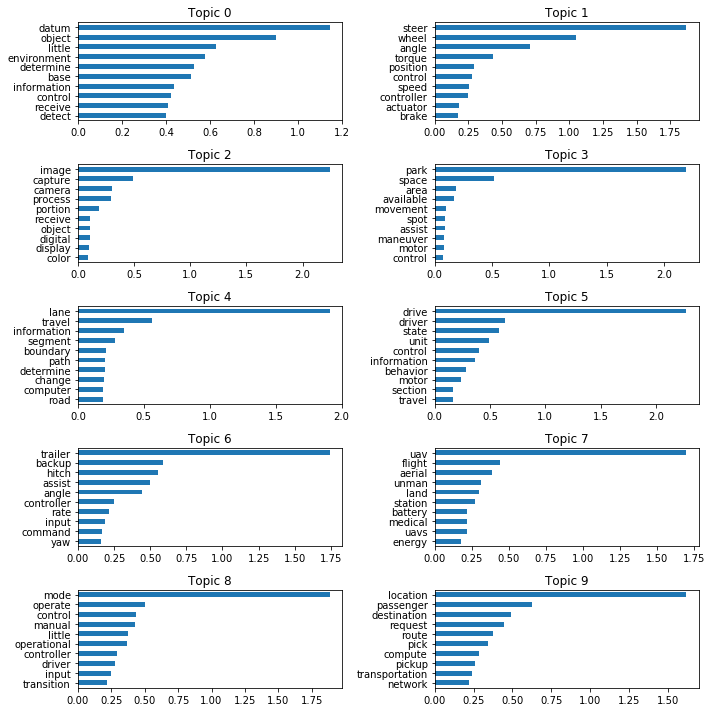

In [43]:
modeler(df.text, 10, 10, NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5), \
        TfidfVectorizer(max_df=.98, min_df=2,stop_words='english'), True)

In [108]:
def area_map(data):
        
    tfidf = TfidfVectorizer(ngram_range=(2,3), max_df = 0.5, min_df= 3, max_features = 1000, stop_words= 'english')
    X_tf = tfidf.fit_transform(data)

    nmf = NMF(n_components=10, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(X_tf)
    comp = nmf.transform(X_tf)
    document_topics = pd.DataFrame(comp, columns=["topic %d" % i for i in range(comp.shape[1])])
    
    return document_topics.plot(kind = 'area', stacked = True, figsize = (20,10))
    

In [109]:
df.index = pd.to_datetime(df['priority date'], format='%d/%b/%Y:%H:%M:%S')
df.index

DatetimeIndex(['2012-03-15', '2014-03-03', '2013-01-25', '2012-11-30',
               '2014-05-23', '2012-04-13', '2012-05-17', '2013-04-05',
               '2013-03-15', '2012-04-11',
               ...
               '2015-12-08', '2015-12-08', '2015-07-31', '2014-12-11',
               '2015-06-26', '2015-03-10', '2015-03-12', '2012-09-07',
               '2014-05-26', '2016-01-26'],
              dtype='datetime64[ns]', name=u'priority date', length=975, freq=None)

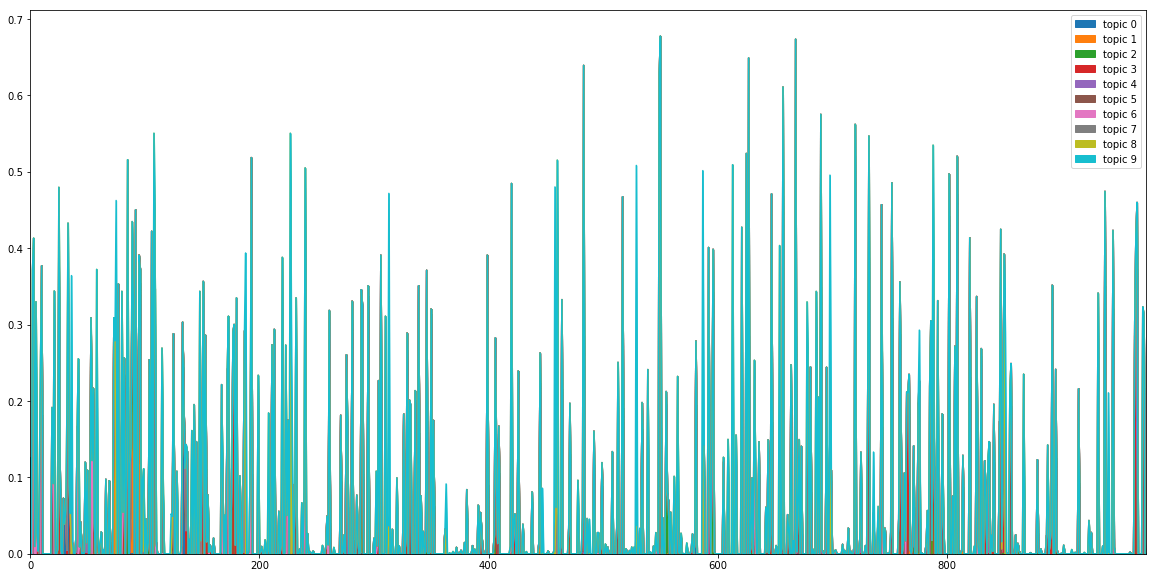

In [110]:
area_map(df.text)